In [ ]:
import pandas as pd
import numpy as np
import re
import nltk
import matplotlib.pyplot as plt
import re
import os
import pandas as pd
import glob
import os
import librosa
import librosa.display
import numpy as np
from tensorflow.contrib.keras.api.keras.utils import to_categorical
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import specgram
import collections
import librosa
from sklearn.naive_bayes import MultinomialNB, GaussianNB, ComplementNB, BernoulliNB
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import learning_curve, validation_curve
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.svm import LinearSVC, SVC, NuSVC
import io
import time
from imblearn.over_sampling import RandomOverSampler, ADASYN, BorderlineSMOTE, SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import BernoulliNB, ComplementNB, MultinomialNB, GaussianNB
from sklearn.svm import SVC, LinearSVC


/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


In [ ]:
csv_data = 'entrada_lexica.csv'

csv_labels = 'classes_tfg2.csv'

classes_df = pd.read_csv(csv_labels)
data_df = pd.read_csv(csv_data)

corpus = data_df.join(classes_df.set_index('file_name'), on='file_name')

# COLOCAR NA MÃO UM TECHO
# teste = pd.read_csv('teste.csv')

#VERIFICAR O JOIN
# corpus.to_csv('final.csv')

In [ ]:
features = corpus.iloc[:, :15]
classes = corpus['Autores'].values
features = features.drop(columns=['file_name'])
features = features.values


new_y_list = []
for author in classes:
  if author == 'Machado de Assis':
    new_y_list.append([0])
  elif author == 'Jose de Alencar':
    new_y_list.append([1])
  elif author == 'Aluisio Azevedo':
    new_y_list.append([2])
  elif author == 'Joaquim Manuel de Macedo':
    new_y_list.append([3])
  elif author == 'Manuel Antonio de Almeida':
    new_y_list.append([4])
  elif author == 'Adolfo Caminha':
    new_y_list.append([5])
  elif author == 'Bernardo Guimaraes':
    new_y_list.append([6])
  else: 
    print(author)
    
new_y = np.array(new_y_list)


ros = RandomOverSampler()
x_new, y_new = ros.fit_resample(features, new_y)

unique, counts = np.unique(y_new, return_counts=True)
print(dict(zip(unique, counts)))

    
x_train, x_test, y_train, y_test = train_test_split(x_new, y_new, test_size=0.20)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

{0: 23, 1: 23, 2: 23, 3: 23, 4: 23, 5: 23, 6: 23}


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Matriz de confusão, sem normalização
[[3 0 0 0 0 0 1]
 [1 3 0 0 0 0 0]
 [0 1 2 0 0 0 0]
 [0 3 0 4 0 0 2]
 [0 0 0 0 4 0 1]
 [0 0 0 0 0 2 0]
 [0 0 0 0 0 0 6]]
Matriz de confusão normalizada
[[0.75 0.   0.   0.   0.   0.   0.25]
 [0.25 0.75 0.   0.   0.   0.   0.  ]
 [0.   0.33 0.67 0.   0.   0.   0.  ]
 [0.   0.33 0.   0.44 0.   0.   0.22]
 [0.   0.   0.   0.   0.8  0.   0.2 ]
 [0.   0.   0.   0.   0.   1.   0.  ]
 [0.   0.   0.   0.   0.   0.   1.  ]]


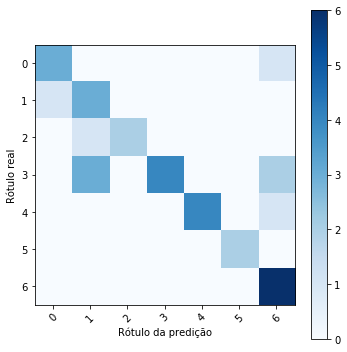

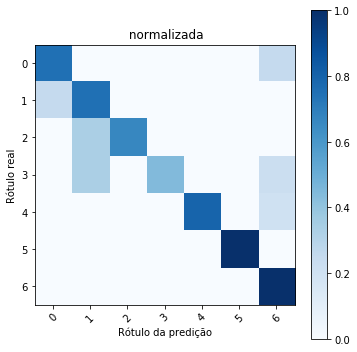

Time: 1.064408779144287
[0.71 0.69 0.71 0.86 0.82]
Random Forest cross-validation: Accuracy: 0.76 (+/- 0.14)


In [ ]:
def plot_confusion_matrix(cm, title, cmap=plt.cm.Blues, a=1):
    labels = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(7)
    plt.xticks(tick_marks, labels, rotation=45)
    plt.yticks(tick_marks, labels)
    plt.tight_layout()
    plt.ylabel('Rótulo real')
    plt.xlabel('Rótulo da predição')
    if a==1:
        plt.savefig(title+'matrixconf')
    else:
        plt.savefig(title+'matrixconfnorm')


def plt_confussion_matrix(y_test, y_pred, title):
    cm = confusion_matrix(y_test, y_pred)
    np.set_printoptions(precision=2)
    print('Matriz de confusão, sem normalização')
    print(cm)
    plt.figure(figsize=(5, 5))
    plot_confusion_matrix(cm, title)

    # Normalize the confusion matrix by row (i.e by the number of samples
    # in each class)
    cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    print('Matriz de confusão normalizada')
    print(cm_normalized)
    plt.figure(figsize=(5, 5))
    plot_confusion_matrix(cm_normalized, title + ' normalizada', a=2)
    plt.show()
    
model = RandomForestClassifier(n_estimators=180, criterion='entropy', max_depth=35, min_samples_split=0.03, min_samples_leaf=0.025, min_weight_fraction_leaf=0.035, max_features=0.65,
                              max_leaf_nodes=22, min_impurity_decrease=0.03) 

model.fit(x_train, y_train)
y_pred = model.predict(x_test)


plt_confussion_matrix(y_test, y_pred, '')

start_1 = time.time()
scores = cross_val_score(model, x_new, y_new, cv=5)

end_1 = time.time()
print("Time: " + str((end_1 - start_1)))

print(scores)

print("Random Forest cross-validation: Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

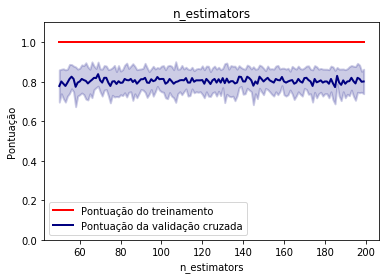

In [ ]:
def plot_validation_curve(train_scores, test_scores, param_range, title, label):
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.title(title)
    plt.xlabel(label)
    plt.ylabel("Pontuação")
    plt.ylim(0.0, 1.1)

    lw = 2

    plt.plot(param_range, train_scores_mean, label="Pontuação do treinamento",
                 color="r", lw=lw)
    plt.fill_between(param_range, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.2,
                     color="r", lw=lw)

    plt.plot(param_range, test_scores_mean, label="Pontuação da validação cruzada",
                 color="navy", lw=lw)
    plt.fill_between(param_range, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.2,
                     color="navy", lw=lw)


    plt.legend(loc="best")
    plt.savefig(title)
    plt.show()
    
    
def create_validation_curve(estimator, X, y, title, label, p_name, p_range):
    train_scores, test_scores = validation_curve(
        estimator,
        X,
        y,
        param_name=p_name,
        param_range=p_range,
        cv=5,
        scoring="accuracy",
        n_jobs=-1
    )
    plot_validation_curve(train_scores, test_scores, p_range, title, label)
    

create_validation_curve(model, x_new, y_new, "n_estimators", "n_estimators", "n_estimators", np.arange(50, 200, 1))

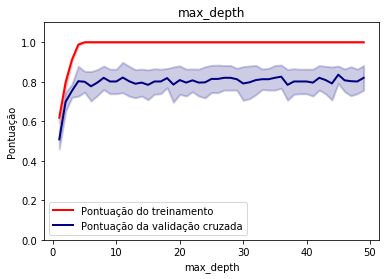

In [ ]:
create_validation_curve(model, x_new, y_new, "max_depth", "max_depth", "max_depth", np.arange(1, 50, 1))

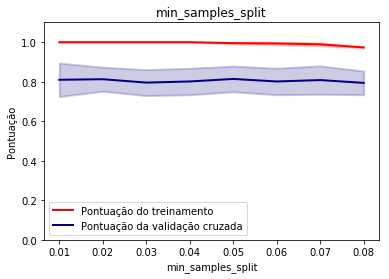

In [ ]:
create_validation_curve(model, x_new, y_new, "min_samples_split", "min_samples_split", "min_samples_split", np.arange(0.01, 0.09, 0.01))

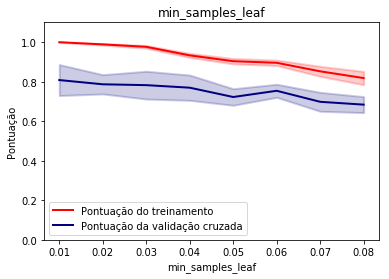

In [ ]:
create_validation_curve(model, x_new, y_new, "min_samples_leaf", "min_samples_leaf", "min_samples_leaf", np.arange(0.01, 0.09, 0.01))

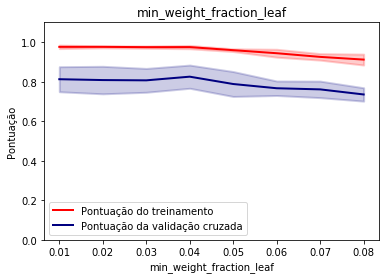

In [ ]:
create_validation_curve(model, x_new, y_new, "min_weight_fraction_leaf", "min_weight_fraction_leaf", "min_weight_fraction_leaf", np.arange(0.01, 0.09, 0.01))

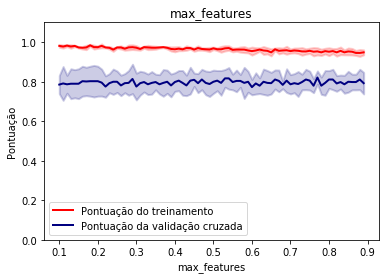

In [ ]:
create_validation_curve(model, x_new, y_new, "max_features", "max_features", "max_features", np.arange(0.1, 0.9, 0.01))

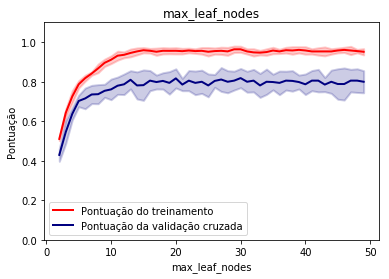

In [ ]:
create_validation_curve(model, x_new, y_new, "max_leaf_nodes", "max_leaf_nodes", "max_leaf_nodes", np.arange(2, 50, 1))

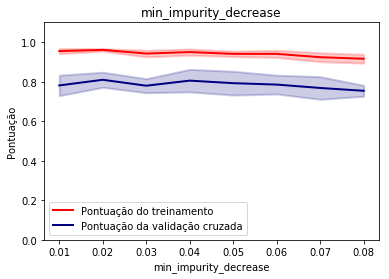

In [ ]:
create_validation_curve(model, x_new, y_new, "min_impurity_decrease", "min_impurity_decrease", "min_impurity_decrease", np.arange(0.01, 0.09, 0.01))